## Workshop Week 5

The goal of the workshop this week is to work through a standard Data Science workflow: exploring data, building models, making predictions, evaluating results.    We will do this in the first instance using a simple linear least squares model and will look at two datasets.  The first is the standard Iris dataset describing flowers, the second is the AutoMPG dataset. 



In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

The datasets we will use are available in a number of forms.  We'll use the versions bundled with the __seaborn__ plotting library since they load as Pandas dataframes.  


In [258]:
iris = sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<module 'seaborn' from 'C:\\Users\\pxpxz_ct9p1p3\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>


## Explore the dataset

Examine the data, what are the columns? How is the spread of variables - eg. is it normally distributed?  You might want to use the [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function which shows all variables plotted against each other as a matrix.  You should also look at the means and variances of each variable.  Get to know the Pandas methods (e.g. the `describe` method) for doing this.

Your goal is to get a good feel for the data you are dealing with. Eventually you will be trying to work out what techniques you might be able to use to work with the data. For now, just get used to exploring it.

In [8]:
iris.shape

(150, 5)

In [9]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

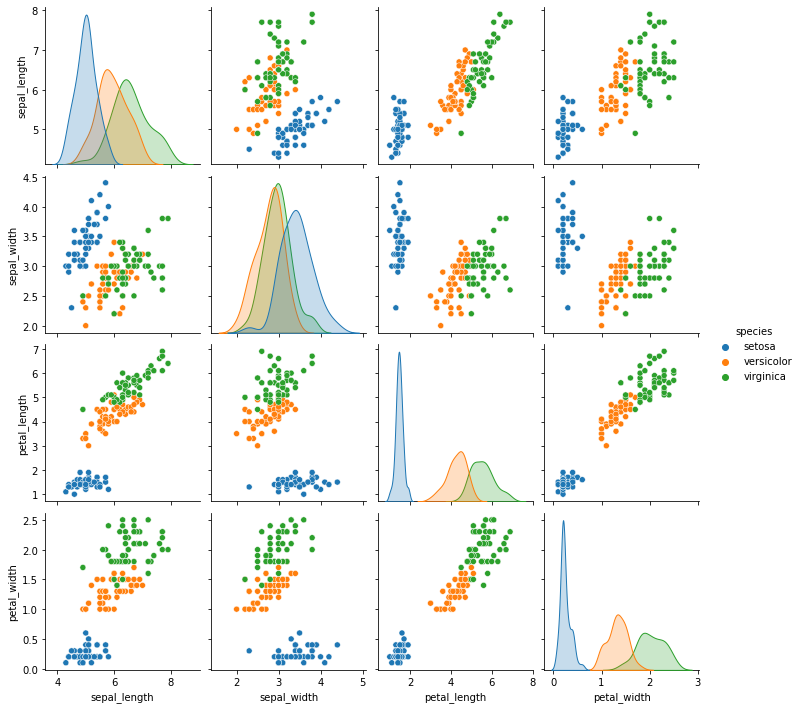

In [5]:
sns.pairplot(iris, hue='species')

In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Linear Regression

A quick search will reveal many different ways to do linear regression in Python. We will use the [sklearn LinearRegression](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) function.  The sklearn module has many standard machine learning methods so it is a good one to get used to working with.  

Linear Regression involves fitting a model of the form:

> $y = O_1X + O_2$

Where $y$ is the (numerical) variable we're trying to predict, $X$ is the vector of input variables, $O_1$ is the array of model coefficients and $O_2$ is the intercept.  In the simple case when X is one-dimensional (one input variable) then this is the forumula for a straight line with gradient $O_1$.

We will first try to predict `petal_width` from `petal_length` in the iris data.  You should look at the plot of these two variables to see that they are roughly correlated.  Here is the code using `slkearn` to do this.   We first create a linear model, then select the data we will use to train it - note that `X` (the input) is a one-column pandas dataframe while `y` (the output) is a Series.  The `fit` method is used to train the model.  The result is a set of coefficients (in this case just one) and an intercept.  


In [215]:
reg = linear_model.LinearRegression()
X = iris[['petal_length']]
y = iris['petal_width']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [0.41575542] + -0.3630755213190291


We can now use the `predict` method to predict the value of `petal_width` from some values of `petal_length`:

In [216]:
reg.predict(X[:3])

array([0.21898206, 0.21898206, 0.17740652])

Prediction in this case is just using the formual $y = x * O_1 + O_2$ - confirm this is the case by evaluating some sample values from `petal_length` (use `reg.coef_` and `reg.intercept_`).

In [217]:
X['petal_length'][0] * reg.coef_ + reg.intercept_

array([0.21898206])

## Evaluating the model

How well does this model fit the data? We can measure the _mean squared error_ which is based on the difference between the real and predicted values of `petal_width` (mean of the squared differences).  Another measure is $R^2$ which measures the amount of variance in the data that is explained by the model.  Smaller MSE is better.  $R^2$ close to 1 is better.

Note that here I need to convert the output Series (`y`) to an `np.array`, this is because the sklearn library really works with numpy datastructures rather than pandas Series and Dataframes. I could have used [sklearn.metrics.mean_squared_error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) here but I wanted to show you that this is just a simple calculation on the results.

In [218]:
predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 0.04206730919499318
R Squared: 0.9271098389904927


## More Input Variables

Linear regression can work with more input variables, in this case the formula $y = x * O_1 + O_2$ becomes a matrix expression with $x$ and $O_1$ being vectors rather than scalars.  The code is almost exactly the same but we select two columns for the input array $X$.  Here we add `sepal_length`.  Note that the coefficients in the model is now a vector of two values:

In [235]:
reg = linear_model.LinearRegression()
X = iris[['petal_length', 'sepal_length']]
y = iris['petal_width']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [ 0.44937611 -0.08221782] + -0.008995972698168986


You can test the model in the same way as before.  Did the model get better? 

In [236]:
predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)
print("MSE: ", mse)
print("R squared: ", r2)

MSE:  0.04096208526408981
R squared:  0.9290248640257687


## Training and Testing Data

What we have done so far is to train and test the model on the same data. This is not good practice as we have no idea how good the model would be on new data.   Better practice is to split the data into two sets - training and testing data.  We build a model on the training data and test it on the test data.  

Sklearn provides a function [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to do this common task.  It returns two arrays of data. Here we ask for 20% of the data in the test set. 

In [237]:
train, test = train_test_split(iris, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


You can now repeat the above procedure but this time train the model on the training data and evaluate on the test data.  Do the MSE and $R^2$ values change? 

**This is your first checkpoint for this week**

**You have to report MSE and $R^2$ values on the training and test set. Also, provide your interpretation of results. Based on the values on training and testing data, comment whether model is overfitting?**

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(120, 2) (30, 2)


In [240]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

predicted = model.predict(X_test)

print("y = x *", model.coef_, "+", model.intercept_)
#print(model.coef_)
print('MSE: ', mean_squared_error(y_test, predicted))
print('R squared: ', r2_score(y_test, predicted))

y = x * [ 0.44381516 -0.05560097] + -0.1234368644163295
[ 0.44381516 -0.05560097]
MSE:  0.040553231806143786
R squared:  0.9098394095365001


## Discussion-1
MSE is low， R squared is close to 1, the modeling based on training data works well on testing data.
the model with two variables, 'petal_length' and 'sepal_length' gives an equation for a 'line of good fit' for the sample of data.

In [245]:
X = iris[['petal_length']]
y = iris['petal_width']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(120, 1) (30, 1)


In [246]:
model2 = linear_model.LinearRegression()
model2.fit(X_train, y_train)

predicted = model2.predict(X_test)

print("y = x *", model2.coef_, "+", model2.intercept_)
#print(model2.coef_)
print('MSE: ', mean_squared_error(y_test, predicted))
print('R squared: ', r2_score(y_test, predicted))

y = x * [0.41132801] + -0.3475783458173918
MSE:  0.025319979789415137
R squared:  0.9528394416173973


## Discussion-2
MSE is low， R squared is close to 1, the modeling based on training data works well on testing data.
the model with only one variables, 'petal_length' gives an equation for a 'line of good fit' for the sample of data, too.

## Summary
1. As can be seen in sns.pairplot, petal_width have fairly good linear relationship with sepal_length, and have a very tight linear relationship with pedal_length, accordingly, O12 is far lower than O11.
2. Model with only one x variable(petal_length) can give a good prediction of y(petal_width), which means model with two x variables(petal_length and setal_length) might be overfitting.

# Auto MPG Dataset

This dataset contains details of different US cars with measures of various physical features and the miles-per-gallon (mpg) measure of fuel consumption.   The goal is to predict MPG from other features. 

- explore this dataset, look at summary statistics, plot the data get an idea of how the variables vary together
- split the data into training and testing sets
- use a least squares linear model to predict MPG from the **weight** of the car, evaluate the result
- add other features to the model, evaluate the results. What is the most accurate model? 
- Evaluate model performance in terms of MSE and $R^2$ scores. Comment on whether adding more features improves model's performance.

Add cells as per your need and answer all the above questions.

In [248]:
mpg = sns.load_dataset('mpg')

In [259]:
mpg.head()
mpg.shape

(398, 9)

In [267]:
mpg_filtered = mpg[mpg['horsepower'].notnull()]
mpg_filtered.shape

(392, 9)

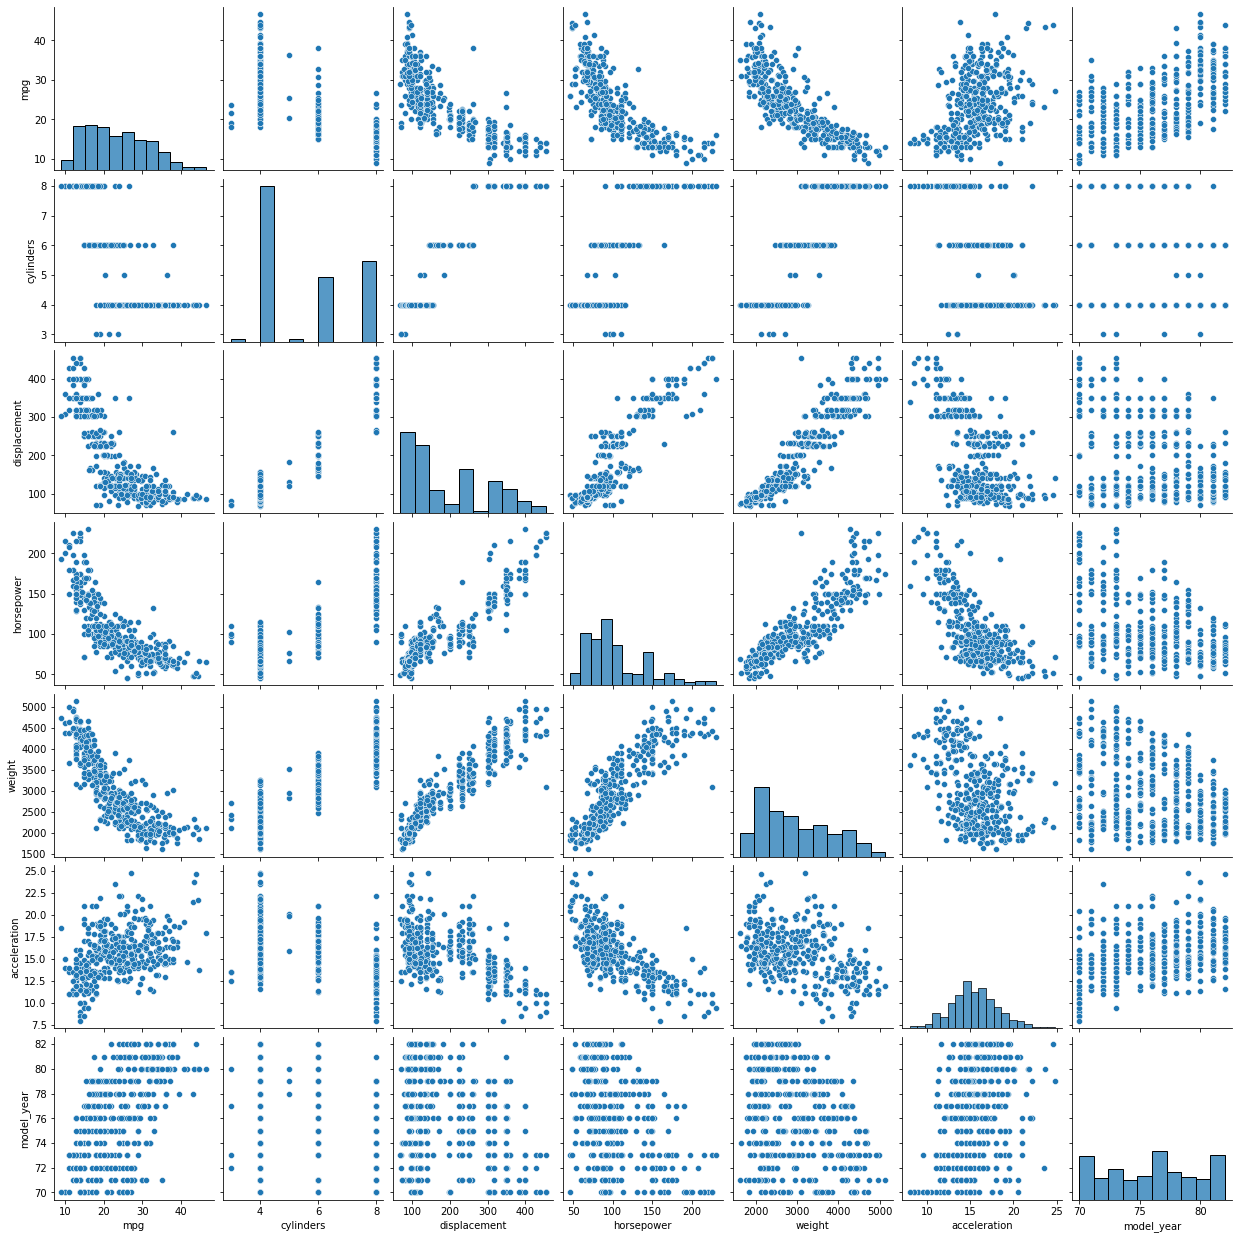

In [268]:
sns.pairplot(mpg_filtered)

**This is your final checkpoint for this week**

**You have to report MSE and $R^2$ values on the training and test set. Also, provide your interpretation of results. Based on the values on training and testing data, comment whether model is overfitting?**

In [340]:
# I will then try to predict MPG from weight in the mpg data. 
# split train and test dataset
x = mpg_filtered[['weight']]
y = mpg_filtered['mpg']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)

# linear regression procedure
reg2 = linear_model.LinearRegression()
reg2.fit(x_train, y_train)
print('y = x * ', reg2.coef_, ' + ', reg2.intercept_)
predicted = reg2.predict(x_train)
print('MSE: ', mean_squared_error(y_train, predicted))
print('R square: ', r2_score(y_train, predicted))

# predict
predicted = reg2.predict(x_test)
print('MSE: ', mean_squared_error(y_test, predicted))
print('R square: ', r2_score(y_test, predicted))

(313, 1)
(79, 1)
y = x *  [-0.00756073]  +  45.78926038422749
MSE:  18.169759918149655
R square:  0.6899285526834971
MSE:  20.853916311392478
R square:  0.6961488372665161


C:\Users\pxpxz_ct9p1p3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


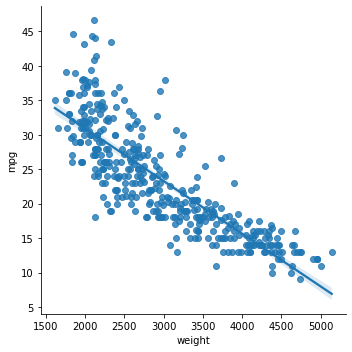

In [341]:
sns.lmplot('weight', 'mpg', mpg_filtered)

C:\Users\pxpxz_ct9p1p3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


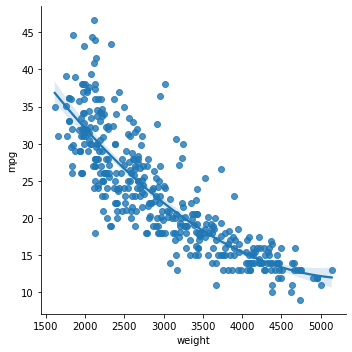

In [321]:
sns.lmplot('weight', 'mpg', mpg_filtered, order=2)

## Discussion
-For weight as the x variable model, we can clearly see that the relationship between weight and mpg is nonlinear, since the straight line is a pool fit.

-More single variables will be modeled as follows before studying the relation among multiple variables, which are different options.

In [ ]:
# I will first try to predict MPG from horsepower in the mpg data. 
# split train and test dataset
x = mpg_filtered[['horsepower']]
y = mpg_filtered['mpg']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)

# linear regression procedure
reg1 = linear_model.LinearRegression()
reg1.fit(x_train, y_train)
print('y = x * ', reg1.coef_, ' + ', reg1.intercept_)

# predict
predicted = reg1.predict(x_test)
print('MSE: ', mean_squared_error(y_test, predicted))
print('R square: ', r2_score(y_test, predicted))

In [323]:
# I will then try to predict MPG from acceleration in the mpg data. 
# split train and test dataset
x = mpg_filtered[['acceleration']]
y = mpg_filtered['mpg']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)

# linear regression procedure
reg3 = linear_model.LinearRegression()
reg3.fit(x_train, y_train)
print('y = x * ', reg3.coef_, ' + ', reg3.intercept_)

# predict
predicted = reg3.predict(x_test)
print('MSE: ', mean_squared_error(y_test, predicted))
print('R square: ', r2_score(y_test, predicted))

(313, 1)
(79, 1)
y = x *  [1.14120236]  +  5.884235146713994
MSE:  41.1705358755077
R square:  0.25190426692518175


In [324]:
# I will then try to predict MPG from two variables(weight and acceleration) in the mpg data. 
# split train and test dataset
x = mpg_filtered[['acceleration', 'weight']]
y = mpg_filtered['mpg']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)

# linear regression procedure
reg4 = linear_model.LinearRegression()
reg4.fit(x_train, y_train)
print('y = x * ', reg4.coef_, ' + ', reg4.intercept_)

# predict
predicted = reg4.predict(x_test)
print('MSE: ', mean_squared_error(y_test, predicted))
print('R square: ', r2_score(y_test, predicted))

(313, 2)
(79, 2)
y = x *  [ 0.26263214 -0.00723413]  +  40.90680844891321
MSE:  17.55906302160422
R square:  0.7061272501603313


In [325]:
# I will then try to predict MPG from acceleration in the mpg data. 
# split train and test dataset
x = mpg_filtered[['model_year']]
y = mpg_filtered['mpg']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)

# linear regression procedure
reg6 = linear_model.LinearRegression()
reg6.fit(x_train, y_train)
print('y = x * ', reg6.coef_, ' + ', reg6.intercept_)

# predict
predicted = reg6.predict(x_test)
print('MSE: ', mean_squared_error(y_test, predicted))
print('R square: ', r2_score(y_test, predicted))

(313, 1)
(79, 1)
y = x *  [1.21330464]  +  -68.62931713254729
MSE:  35.92654581682953
R square:  0.32159800212402123


In [332]:
# I will then try to predict MPG from two variables(weight and model_year) in the mpg data. 
# split train and test dataset
x = mpg_filtered[['model_year', 'weight']]
y = mpg_filtered['mpg']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)

# linear regression procedure
reg5 = linear_model.LinearRegression()
reg5.fit(x_train, y_train)
print('y = x * ', reg5.coef_, ' + ', reg5.intercept_)

# predict
predicted = reg5.predict(x_test)
print('MSE: ', mean_squared_error(y_test, predicted))
print('R square: ', r2_score(y_test, predicted))

(313, 2)
(79, 2)
y = x *  [ 0.7582701  -0.00657892]  +  -14.621047118641048
MSE:  9.655935154878517
R square:  0.8428406791170178


## Summary
For all 4 single x (weight, horsepower, acceleration, model_year) variable models, MSE and R square are not good.  
Adding more features does improve model's performance, it can be seen that the result of the model with two x variables (weight and model_year) fitting for a set of coefficients is much better than before, with the score increasing from 0.5~0.7 to 0.8. 
This demonstrates that both weight and model_year are important for the prediction and regression. 

## Commit your finished work on Github
Here are the list of steps you need to follow to commit your work on Github to get checkpoint mark for this week.

Once you finished all the above questions, save the notebook by clicking 'save' button in the toolbar.

You need to follow the same instructions to commit your work on your Github repository.

Step 1. Change your current directory to `practical-workshops-yourName` by doing `cd` command. You can type:
                    `cd practical-workshops-yourName`
                    
Step 2: Add your Workshop Week 5.ipynb using:
                 `git add "Workshop Week 5.ipynb`
                 
Step 3: Commit your work:
                `git commit -m "Finished Workshop 5`
                
Step 4: Push your changes:
                `git push origin master`
                
Step 5: Confirm whether your finished work is now on Github repository by signing into your Github account and clicking on your repository. You can see your added `Workshop Week 5.ipynb` file as well as your `commit message` and `time` of your commit.

Step 6: Well done!. You have now finished your Practical Workshop Week 5. Appreciate yourself.